In [1]:
# # # # INSTALLING AND IMPORTING THE LIBRARIES # # # #

'''spaCy to perform several NLP related tasks, 
   such as part-of-speech tagging, named entity recognition, and dependency parsing
'''
'''Word Cloud is a data visualization technique used for representing text data 
   in which the size of each word indicates its frequency or importance
'''
# !python -m spacy download en_core_web_sm
# !python -m pip install wordcloud

# Importing the General Libraries
import pandas as pd
import re
import string
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import spacy

# Importing the libraries used for pre_processing texts
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import words

In [2]:
# Loading the dataset
df = pd.read_csv('text_emotion.csv')
df

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [3]:
# Storing the required details in a list

# result is list of the sentiments of each tweet
result = [i for i in df['sentiment']]
# content is the list of all the tweets
content  = [i for i in df['content']]

In [4]:
# # # # FINDING SUBJECTS AND OBJECTS OF EACH TWEET # # # #
''' Using Spacy to find token dependencies
    subj ---->  Subject
    obj  ---->  Object
'''

# List for subjects and objects of each tweet
l_object = []
l_subject = []

nlp = spacy.load('en_core_web_sm')

# Function to find the subject of a tweet
def get_subject_phrase(doc):
    for token in doc:
        if ("subj" in token.dep_):
            subtree = list(token.subtree)
            start = subtree[0].i
            end = subtree[-1].i + 1
            return doc[start:end]
        
# Function to find the object of a tweet
def get_object_phrase(doc):
    for token in doc:
        if ("obj" in token.dep_):
            subtree = list(token.subtree)
            start = subtree[0].i
            end = subtree[-1].i + 1
            return doc[start:end]

# Loop to iterate over each tweet and finding respective subjects and objects
for sentence in content:
    sentence = nlp(sentence)
    l_subject.append(get_subject_phrase(sentence))
    l_object.append(get_object_phrase(sentence))


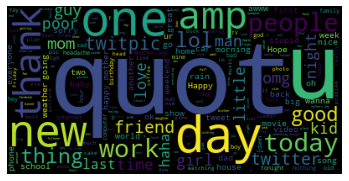

In [5]:
subjects = " ".join(set([str(i) for i in l_subject]))
wordcloud2 = WordCloud().generate(subjects)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

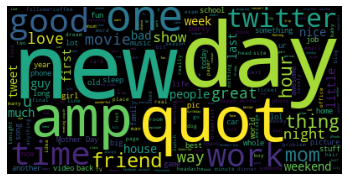

In [6]:
objects = " ".join(set([str(i) for i in l_object]))
wordcloud2 = WordCloud().generate(objects)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [7]:
# # # # PRE-PROCESSING TWEETS # # # #
''' Cleaning the tweets:
    1. Remove the usernames
    2. Remove all the numbers
    3. Convert the tweet in lowercase
    4. Remove all the links
    5. Remove special characters
    6. Remove stopwords 
    7. Tokenizing the data
    8. Stemming the data
'''

def pre_Processing(tweet):

    # Step 1: Removing all the usernames
    tweet = re.sub("(@[\w]+)", "", tweet)

    # Step 2: Removing all the numbers
    tweet = re.sub("[0-9]+", "", tweet)

    # Step 3: Converting the tweets into lowercase
    tweet = tweet.lower()

    # Step 4: Removing all the hyperlinks
    tweet = re.sub("((https?[\S]+)|www[\S]+)", '', tweet)

    # Step 5: Removing special characters
    tweet = re.sub("[^a-zA-Z0-9 ]+", " ",tweet)

    # Step 6: Removing all the StopWords
    tweet = " ".join([i for i in tweet.split() if i not in stopwords.words()])
    
    # Step 7: Tokenizing the data
    #   Tokenization is the process of splitting text into smaller chunks, called tokens
    tweet = word_tokenize(tweet)

    # Step 8: Stemming
    #   Stemming is the process of removing and replacing suffixes from a token to obtain the root
    #   or base form of the word. This is called a ‘stem’.
    #   For example, the stem for the words, ‘satisfied’, ‘satisfaction’, and ‘satisfying’ is ‘satisfy’
    stemmer = PorterStemmer()
    tweets = [stemmer.stem(word) for word in tweet]
    tweet = " ".join([i for i in tweets])
    return(tweet)

In [8]:
# Preprocessing each tweet and storing it in content_L

content_L = []
for sent in df['content']:
    content_L.append(pre_Processing(sent))
content_S = pd.Series(content_L)


In [9]:
# Modifying the dataframe by adding a Series of pre-processed tweets
df['preprocess'] = content_S

# Removing Na values and unnecessary columns
df.dropna(inplace=True)
df = df.drop(columns=['content','author','tweet_id'])

In [10]:
# Storing the modified dataframe as csv file
df.to_csv("preprocessdf.csv")